In [1]:
from src.Sharq import *

In [2]:
# uncomment this line to create the rules set for th experiments made in the paper. The rules set wil be created under the 'Rules' folder
# create_upload_rules_set(['adult', 'spotify_all', 'flights', 'isolet.arff'])

In [3]:
# uncomment this line to create the rules set we used in the case study of the paper. The rule set wil be created under the 'Rules' folder
# create_single_rules_set('adult', 4, 40, 10000, is_score_function, 0.05, 0.05)

In [4]:
adults_rules_set = pd.read_csv('Rules/example_adult.csv')

In [5]:
sharq = Sharq(rules_set=adults_rules_set)
results = sharq.run_sharq()

In [6]:
sharq.set_orig_dataset('adult') # if you are using a regular binning style (as the experiments in the paper) you can use the binning_style='regular'

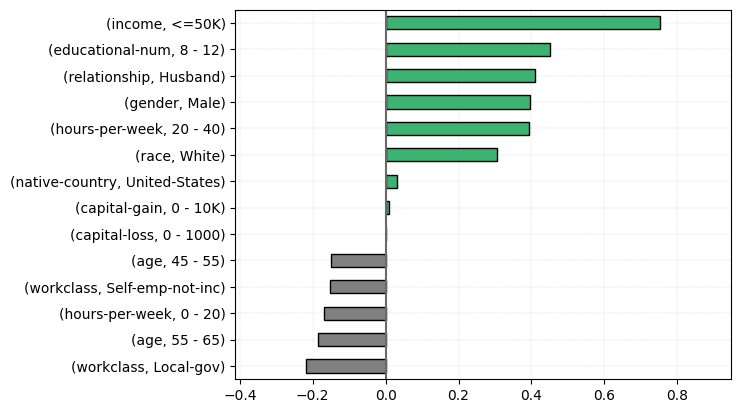

In [7]:
top_bottom_elements = sharq.get_top_bottom(frequency_threshold=2)
get_sharq_visualization(top_bottom_elements)

In [8]:
normalized_results = sharq.get_normalized_sharq()

In [9]:
normalized_results

{'income_<=50K': 5.0,
 'educational-num_(8, 12]': 4.0,
 'relationship_Husband': 3.3333333333333335,
 'occupation_Craft-repair': 2.090909090909091,
 'relationship_Own-child': 2.0,
 'hours-per-week_(20, 40]': 1.8,
 'income_>50K': 1.7777777777777777,
 'gender_Male': 1.75,
 'occupation_Adm-clerical': 1.5294117647058822,
 'age_(0, 25]': 1.5,
 'relationship_Unmarried': 1.4210526315789473,
 'occupation_Other-service': 1.4,
 'gender_Female': 1.375,
 'occupation_Machine-op-inspct': 1.36,
 'race_Black': 1.1111111111111112,
 'workclass_Self-emp-not-inc': 1.0,
 'workclass_Private': 1.0,
 'hours-per-week_(0, 20]': 1.0,
 'workclass_Local-gov': 0.9705882352941176,
 'hours-per-week_(40, 60]': 0.9230769230769231,
 'educational-num_(0, 8]': 0.9230769230769231,
 'occupation_Exec-managerial': 0.9130434782608695,
 'age_(55, 65]': 0.8787878787878788,
 'occupation_Sales': 0.8620689655172413,
 'educational-num_(12, 16]': 0.8333333333333334,
 'occupation_Prof-specialty': 0.7857142857142857,
 'age_(35, 45]': 0.

In [10]:
results

{'workclass_Local-gov': np.float64(-0.21794307672063545),
 'age_(55, 65]': np.float64(-0.18437930740816752),
 'hours-per-week_(0, 20]': np.float64(-0.16960412671493563),
 'workclass_Self-emp-not-inc': np.float64(-0.15158154835997256),
 'age_(45, 55]': np.float64(-0.14994714267587114),
 'occupation_Sales': np.float64(-0.14139947059093222),
 'occupation_Prof-specialty': np.float64(-0.1257831822340883),
 'race_Black': np.float64(-0.11942154179890614),
 'educational-num_(0, 8]': np.float64(-0.09951339278830962),
 'occupation_Machine-op-inspct': np.float64(-0.09231922889763537),
 'age_(35, 45]': np.float64(-0.09140025807217712),
 'occupation_Exec-managerial': np.float64(-0.08528342816728514),
 'relationship_Not-in-family': np.float64(-0.0850253324294539),
 'age_(25, 35]': np.float64(-0.05498835077353112),
 'occupation_Other-service': np.float64(-0.03159916218272969),
 'relationship_Unmarried': np.float64(-0.016342927250035787),
 'educational-num_(12, 16]': np.float64(-0.007820174246881815),

C:\Users\hbenefraim\PycharmProjects\SHARQ\src\Utilities.py:276: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  elements_stats_df = pd.concat([elements_stats_df, pd.DataFrame([{'element':element, 'frequency': elements_freq[element], 'frequency rank': frequency_rank, 'SHARQ rank': sharq_rank, 'element\'s rules': len(filtered_rules_set), 'low scored rules': low_group, 'medium scored rules': medium_group, 'high scored rules': high_group, 'SHARQ/frequency': sharq_rank/frequency_rank}])], ignore_index=True)
C:\Users\hbenefraim\PycharmProjects\SHARQ\src\Utilities.py:284: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when det

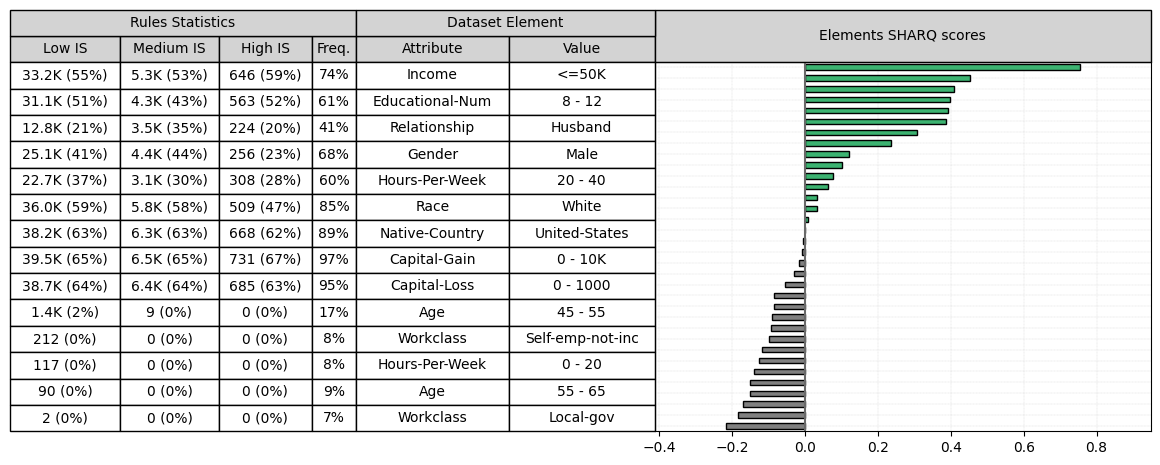

<Figure size 640x480 with 0 Axes>

In [11]:
sharq.get_elements_table_bar_visualization(elements=top_bottom_elements)

C:\Users\hbenefraim\PycharmProjects\SHARQ\src\Utilities.py:276: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  elements_stats_df = pd.concat([elements_stats_df, pd.DataFrame([{'element':element, 'frequency': elements_freq[element], 'frequency rank': frequency_rank, 'SHARQ rank': sharq_rank, 'element\'s rules': len(filtered_rules_set), 'low scored rules': low_group, 'medium scored rules': medium_group, 'high scored rules': high_group, 'SHARQ/frequency': sharq_rank/frequency_rank}])], ignore_index=True)
C:\Users\hbenefraim\PycharmProjects\SHARQ\src\Utilities.py:284: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when det

<Figure size 640x480 with 0 Axes>

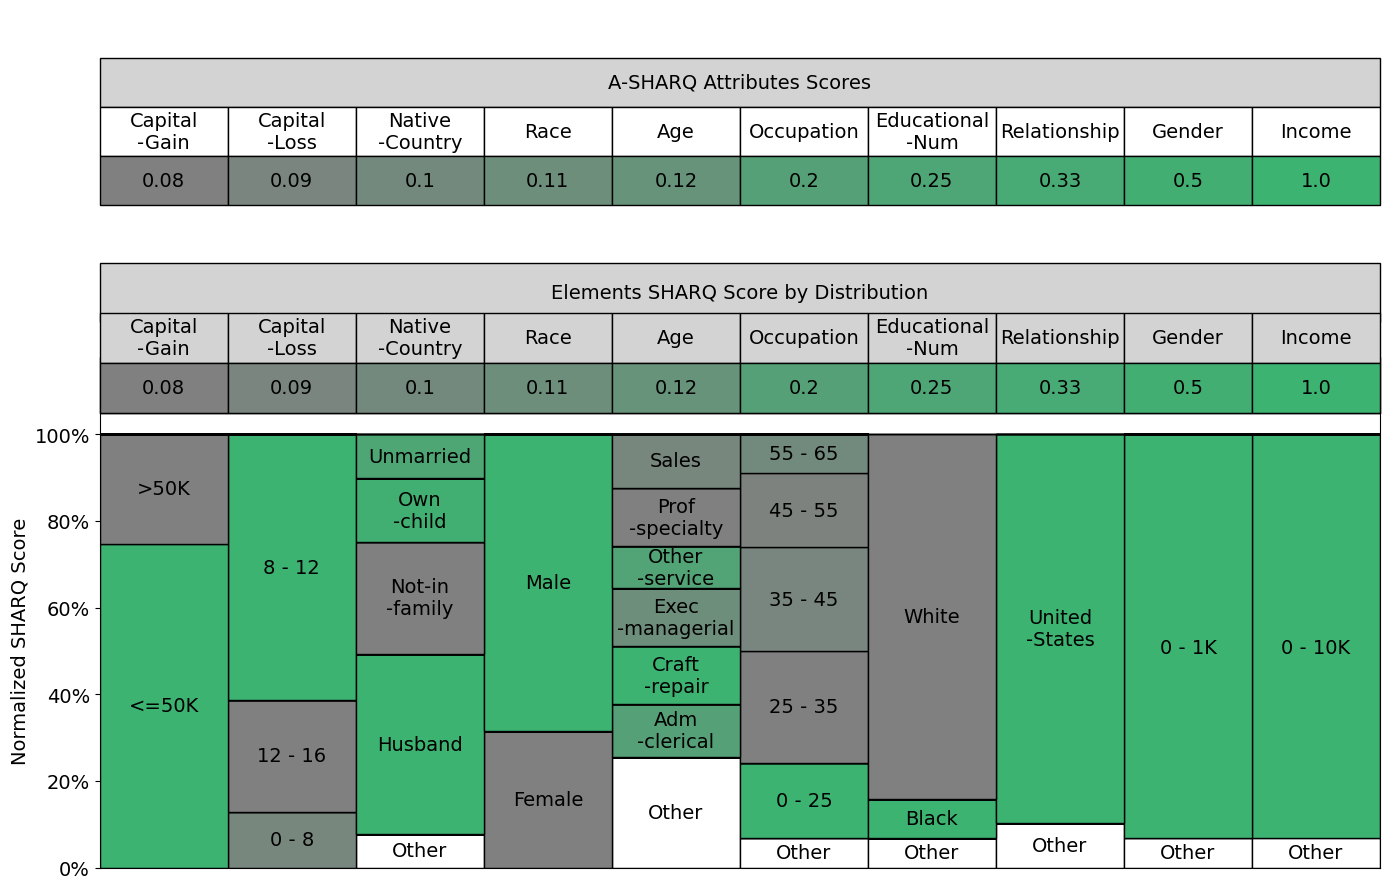

In [12]:
sharq.get_columns_elements_heatmap_table_visualization()